In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_set = pd.read_csv("spam_ham_dataset.csv")

In [3]:
data_set.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
data_set.drop(['Unnamed: 0'] , axis=1 , inplace=True)

In [5]:
data_set.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [6]:
data_set.count()

label        5171
text         5171
label_num    5171
dtype: int64

In [7]:
data_set.isnull().count()

label        5171
text         5171
label_num    5171
dtype: int64

In [8]:
data_set.describe()

,label_num
count,5171.000000
mean,0.289886
std,0.453753
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [9]:
data_set.head(5)

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [10]:
X = data_set.iloc[:,1]
Y = data_set.iloc[:,-1]

In [11]:
X.head()

0    Subject: enron methanol ; meter # : 988291\r\n...
1    Subject: hpl nom for january 9 , 2001\r\n( see...
2    Subject: neon retreat\r\nho ho ho , we ' re ar...
3    Subject: photoshop , windows , office . cheap ...
4    Subject: re : indian springs\r\nthis deal is t...
Name: text, dtype: object

In [12]:
Y.head()

0    0
1    0
2    0
3    1
4    0
Name: label_num, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [14]:
print(f"Length of X_train : {len(X_train)}\nLength of X_test : {len(X_test)}\nLength of Y_train : {len(Y_train)}\nLength of Y_test : {len(Y_test)}")

Length of X_train : 3619
Length of X_test : 1552
Length of Y_train : 3619
Length of Y_test : 1552


In [15]:
from sklearn.feature_extraction.text import CountVectorizer

C_V = CountVectorizer()
X_train_count = C_V.fit_transform(X_train.values)

In [16]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
X_train_count

<3619x40647 sparse matrix of type '<class 'numpy.int64'>'
	with 321855 stored elements in Compressed Sparse Row format>

In [18]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB(alpha=1)
mnb.fit(X_train_count,Y_train)

MultinomialNB(alpha=1, class_prior=None, fit_prior=True)

In [19]:
mnb.score(X_train_count,Y_train)

0.9861840287372202

In [20]:
y_pred = mnb.predict(X_train_count)

In [21]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = C_V.transform(emails)
mnb.predict(emails_count)

array([0, 1], dtype=int64)

In [22]:
#NOW USING PIPELINE for doing the same thing

In [23]:
from sklearn.pipeline import Pipeline

p = Pipeline([
               ('vectorizer' , CountVectorizer()),
               ('nb' , MultinomialNB())
            ])

In [24]:
p.fit(X_train,Y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('nb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [25]:
pipeline_y_pred = p.predict(X_test)

In [26]:
print(f"Training Score : {p.score(X_train,Y_train)*100} %\nTesting Score : {p.score(X_test,Y_test)*100} %")

Training Score : 98.61840287372202 %
Testing Score : 97.74484536082474 %


In [27]:
from sklearn.metrics import accuracy_score , confusion_matrix
ac = accuracy_score(pipeline_y_pred,Y_test)*100
cm = confusion_matrix(pipeline_y_pred,Y_test)

In [28]:
print(f"Accuracy Score : {ac} %\nConfusion MAtrix :\n{cm}")

Accuracy Score : 97.74484536082474 %
Confusion MAtrix :
[[1115   22]
 [  13  402]]


In [29]:
p.predict(['Explore our Special Festive Range!'])

array([1], dtype=int64)

In [30]:
import seaborn as sb

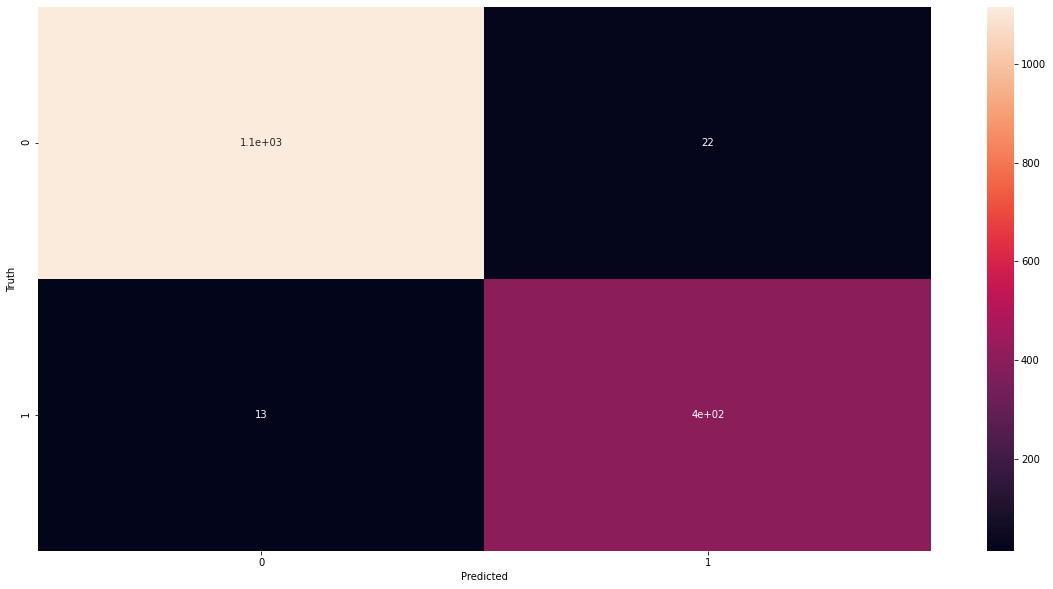

In [31]:
plt.figure(figsize=(20,10))
sb.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()